In [1]:
import numpy as np
import pandas as pd
import time
import itertools
import matplotlib.pyplot as plt

In [2]:
from glob import glob

In [3]:
traj_file = glob(r"D:\云水资源\CWR_L\zd*")
traj_file

['D:\\云水资源\\CWR_L\\zd05050100',
 'D:\\云水资源\\CWR_L\\zd05050106',
 'D:\\云水资源\\CWR_L\\zd05050112',
 'D:\\云水资源\\CWR_L\\zd05050118',
 'D:\\云水资源\\CWR_L\\zd05050200',
 'D:\\云水资源\\CWR_L\\zd05050206',
 'D:\\云水资源\\CWR_L\\zd05050212',
 'D:\\云水资源\\CWR_L\\zd05050218',
 'D:\\云水资源\\CWR_L\\zd05050300',
 'D:\\云水资源\\CWR_L\\zd05050306',
 'D:\\云水资源\\CWR_L\\zd05050312',
 'D:\\云水资源\\CWR_L\\zd05050318',
 'D:\\云水资源\\CWR_L\\zd05050400',
 'D:\\云水资源\\CWR_L\\zd05050406',
 'D:\\云水资源\\CWR_L\\zd05050412',
 'D:\\云水资源\\CWR_L\\zd05050418',
 'D:\\云水资源\\CWR_L\\zd05050500',
 'D:\\云水资源\\CWR_L\\zd05050506',
 'D:\\云水资源\\CWR_L\\zd05050512',
 'D:\\云水资源\\CWR_L\\zd05050518',
 'D:\\云水资源\\CWR_L\\zd05050600',
 'D:\\云水资源\\CWR_L\\zd05050606',
 'D:\\云水资源\\CWR_L\\zd05050612',
 'D:\\云水资源\\CWR_L\\zd05050618',
 'D:\\云水资源\\CWR_L\\zd05050700',
 'D:\\云水资源\\CWR_L\\zd05050706',
 'D:\\云水资源\\CWR_L\\zd05050712',
 'D:\\云水资源\\CWR_L\\zd05050718',
 'D:\\云水资源\\CWR_L\\zd05050800',
 'D:\\云水资源\\CWR_L\\zd05050806',
 'D:\\云水资源\\CWR_L\\zd05050812',
 'D:\\云水

In [4]:
# with open(traj_file[0],encoding='utf-8') as file:
#     content=file.read()
#     print(content)     ##rstrip()删除字符串末尾的空行
###逐行读取数据
# for line in content:
#     print(line)

In [4]:
headerline=['traj_num', 'None', 'Year', 'Month', 'Day', 'Hour','None2', 'None3', 'Back_Hour', 'Lat', 'Lon', 'AGL', 'hPa', 'Vapor_Mix']
traj_arr_total = np.zeros([108, 240, 3])*np.nan #初始仅一层
for filenum in range(2):
    data = pd.read_table(traj_file[filenum], skiprows=[x for x in range(0, 118)], 
                       header=None, sep=' +', engine='python', names=headerline)
    grouped = data.groupby(['traj_num'])
    traj_arr = np.zeros([108, 240, 3])*np.nan #108个起始点组， 240最大后推时次，3个数据
    
    count_n = 0
    for name, group in grouped:
        temp = group[['Lat','Lon','Vapor_Mix']]
        temp_arr = temp.to_numpy()
        print(name, temp_arr.shape)
        lenth = temp_arr.shape[0]
        traj_arr[count_n,:lenth,:] = temp_arr
        count_n += 1
    if filenum == 0:
        traj_arr_total = traj_arr
    else:
        traj_arr_total = np.vstack([traj_arr_total, traj_arr])
        

1 (217, 3)
2 (218, 3)
3 (217, 3)
4 (217, 3)
5 (163, 3)
6 (84, 3)
7 (217, 3)
8 (217, 3)
9 (217, 3)
10 (217, 3)
11 (208, 3)
12 (57, 3)
13 (217, 3)
14 (217, 3)
15 (217, 3)
16 (217, 3)
17 (217, 3)
18 (45, 3)
19 (217, 3)
20 (217, 3)
21 (217, 3)
22 (217, 3)
23 (217, 3)
24 (59, 3)
25 (217, 3)
26 (217, 3)
27 (217, 3)
28 (217, 3)
29 (217, 3)
30 (79, 3)
31 (217, 3)
32 (217, 3)
33 (217, 3)
34 (217, 3)
35 (217, 3)
36 (217, 3)
37 (217, 3)
38 (217, 3)
39 (217, 3)
40 (217, 3)
41 (217, 3)
42 (217, 3)
43 (217, 3)
44 (217, 3)
45 (217, 3)
46 (217, 3)
47 (217, 3)
48 (217, 3)
49 (217, 3)
50 (217, 3)
51 (217, 3)
52 (217, 3)
53 (143, 3)
54 (84, 3)
55 (217, 3)
56 (217, 3)
57 (217, 3)
58 (217, 3)
59 (217, 3)
60 (46, 3)
61 (217, 3)
62 (217, 3)
63 (217, 3)
64 (217, 3)
65 (217, 3)
66 (60, 3)
67 (217, 3)
68 (217, 3)
69 (217, 3)
70 (217, 3)
71 (217, 3)
72 (217, 3)
73 (217, 3)
74 (217, 3)
75 (217, 3)
76 (217, 3)
77 (150, 3)
78 (186, 3)
79 (217, 3)
80 (217, 3)
81 (217, 3)
82 (217, 3)
83 (152, 3)
84 (187, 3)
85 (217, 

In [5]:
def Get_TSV(op1, op2, cluster):
    tsv = 0
    tsv_cluster = [x for x in cluster]

    csv_sum = Get_CSV(op1+op2)#融合后计算csv
    tsv_cluster.remove(op1)
    tsv_cluster.remove(op2)
    

    for i in range(len(tsv_cluster)):
        csv_temp = Get_CSV(tsv_cluster[i])
        tsv += csv_temp
        
    tsv += csv_sum

    assert ~np.isnan(tsv), "TSV出现nan值！请检查"
    
    return tsv

def Get_CSV(member):
#     print(member, len(member))
    csv = 0
    cluster_Time = 150 #向后计算小时数
    if len(member) == 1:
        return 0
    else:
        latlon = np.zeros([len(member), cluster_Time, 2])

        for i in range(len(member)):
            latlon[i,:,:] = traj_arr_total[member[i],0:cluster_Time,0:2] #利用编号取得对应轨迹条的坐标组
        latlon_mean = np.nanmean(latlon, axis=0)
        csv = np.nansum((latlon - latlon_mean)**2) #对多个轨迹条做平均，求对应的方差

    return csv

In [131]:
#先计算108条轨迹的聚类算法, cluster_list\begin\next均记录过程中组中元素代号的变化，如[0],[1] -> [0, 1]

traj_num = traj_arr_total.shape[0]
cluster_list = [[x] for x in range(traj_num)]
cluster_begin = [[x] for x in range(traj_num)]
cluster_next = [[x] for x in range(traj_num)] #初始化 迭代列表

#聚类20个轨迹点，对应240个小时

In [159]:
import re

s1 = '11_23+10'
s2 = '111_23+10'
op1 = 11
op2 = 23+10
patterns = [fr'\b{op1}_.*', fr'\b{op2}']
special_str = re.compile('|'.join(patterns))
res1 = special_str.search(s1)
res2 = special_str.search(s2)
# for keyname in test_dict.keys():
#     if special_str.search(keyname):
#         print(keyname)

In [161]:
res2.group()

AttributeError: 'NoneType' object has no attribute 'group'

In [162]:
res1.group()

'11_23+10'

In [8]:
op1, op2 = '1+128+11'.rsplit('+', maxsplit=1)
op1, op2

('1+128', '11')

In [240]:
#计算簇分类的新算法

traj_num = traj_arr_total.shape[0]
cluster_list = [[x] for x in range(traj_num)]
cluster_begin = [[x] for x in range(traj_num)]
cluster_next = [[x] for x in range(traj_num)] #初始化 迭代列表

min_TSV = 0
count = 0#统计迭代次数
first_caculate = True
###记录过程中两两TSV计算结果的字典，每两两元素计算的结果与键值唯一对应
TSV_initdict = {}
TSV_list = []

def Init_key(op1, op2):
    str1 = ''
    str2 = ''
    if len(op1) == 1:
        str1 = str(op1[0])
    else:
        str1 = str(op1[0])
        for x in op1[1:]:
            str1 = str1 + '+' +str(x)
    if len(op2) == 1:
        str2 = str(op2[0])
    else:
        str2 = str(op2[0])
        for y in op2[1:]:
            str2 = str2 + '+' + str(y)
    # print(str1+'+'+str2)
    return str1+'_'+str2
def change_minTSV(TSV, min_TSV, cluster_begin):
    min_TSV = TSV #最小值变更
    cluster_temp = cluster_begin.copy() #储存变更前的簇代号组合
    cluster_temp.remove(op[0]) #除去旧簇元素
    cluster_temp.remove(op[1])
    temp = op[0]+op[1]  #组建新的簇组合
    cluster_NextResult = cluster_temp + list([temp]) #储存新的簇分类结果
    return cluster_NextResult, min_TSV

def pop_NewCombination_key(TSV_dict, key_min, cluster_begin):
    #逆向查找+号
    op1, op2 = key_min.rsplit('_', 1)
    op1 = op1.replace('+', '\+')
    op2 = op2.replace('+', '\+')
    print('replace :', op1, op2)
    items_char1, items_char2 = key_min.split('_')
    items_s1 = items_char1.split('+')
    items_s2 = items_char2.split('+')
    items_s = items_char1 + '+' + items_char2
    items_int1 = [int(x) for x in items_s1]
    items_int2 = [int(x) for x in items_s2]
    items_int = items_int1 + items_int2
    # print(items_int1, items_int2)
    # print(op1, op2)
    patterns = [fr'\b{op1}_.*', fr'.*_{op1}\b', fr'.*_{op2}\b', fr'\b{op2}_.*']
    # print(patterns)
    special_str = re.compile('|'.join(patterns))
    cluster_list = cluster_begin.copy()
    pop_keynames = []
    print('pop_NewCombination_key', items_int1, items_int2)
    print('TSV_dict remove:', op1, op2)

    cluster_list.remove(items_int1)
    cluster_list.remove(items_int2)

    for keyname in TSV_dict.keys():
        if special_str.search(keyname):
            if op1 == '11\+23':
                print('remove', keyname)
            pop_keynames.append(keyname)
    for x in pop_keynames:
        TSV_dict.pop(x) 
    if key_min in TSV_dict.keys():
        TSV_dict.pop(key_min)
    return cluster_list, TSV_dict, items_int, items_s


# while len(cluster_next) > 1:
for _ in range(14):
    if first_caculate == True:
        for op in itertools.combinations(cluster_begin, 2):
            TSV = Get_TSV(op[0], op[1], cluster_begin)#计算一种组合的TSV结果
            keyname = Init_key(op[0], op[1])
            TSV_initdict[keyname] = TSV #初始化第一次计算的结果
            # if (TSV < min_TSV) | (min_TSV == 0):#若TSV比min_TSV更小
            #     cluster_next, min_TSV = change_minTSV(TSV, min_TSV, cluster_begin)
        #遍历计算TSV后，进行最小值查找
        key_min = min(TSV_initdict, key=TSV_initdict.get)
        temp_TSV = min_TSV
        min_TSV = min(TSV_initdict.values())
        #剔除新组合的元素与其他元素的字典相关值
        cluster_next, TSV_dict, new_items, new_items_s = pop_NewCombination_key(TSV_initdict, key_min, cluster_begin)
        change_TSV = (min_TSV-temp_TSV)/temp_TSV #计算TSV变化率
        TSV_list.append(change_TSV)
        print("TSV1:{}, TSV2:{}".format(
            round(temp_TSV, 1), round(min_TSV, 1)
            ))
        print("输出：\nTSV:{:.2f}%,簇分类:{}".format(change_TSV*100, len(cluster_next)))
        # if not new_items in cluster_next:
        #     print(1)
        cluster_begin = cluster_next + [new_items] #传给下一次迭代的簇分来输入
        print("new_items:", new_items)
        first_caculate = False
    else:
        #计算新的TSV_min
        temp_TSV = min_TSV.copy()#储存上一个TSV最小值
        key_min = min(TSV_dict, key=TSV_dict.get)
        min_TSV = min(TSV_dict.values()) #计算字典内的最小TSV值以及对应键值
        iterable_tsv = []

        print(cluster_begin)
        #新的items与其他元素计算TSV
        for x in cluster_next:
            # print(new_items, x)
            iterable_tsv.append(Get_TSV(new_items, x, cluster_begin))
            
        # iterable_tsv = [Get_TSV(new_items, x, cluster_begin) for x in cluster_next]
        if min(iterable_tsv) < min_TSV:
            min_TSV = min(iterable_tsv) #替换最小TSV值
            #从TSV_dict删去组成新组合的元素的TSV数据
            index = iterable_tsv.index(min(iterable_tsv))
            print(index, cluster_next[index], key_min)
            key_min = Init_key(new_items, cluster_next[index]) #建立新的键值
            print(key_min)
            cluster_next, TSV_dict, new_items, new_items_s = pop_NewCombination_key(TSV_dict, key_min, cluster_begin)
            print('一类', new_items, key_min)
        else:
            #需加入新的TSV字典数据
            
            # TSV_dict.pop(key_min)
            for num in range(len(cluster_next)):
                x = cluster_next[num]
                key_name = Init_key(x, new_items)
                # print("新增的keyname", key_name)
                TSV_dict[key_name] = iterable_tsv[num]
            print('二类', new_items, key_min)
            #指定删除键值如'2+8_10'
            cluster_next, TSV_dict, new_items, new_items_s = pop_NewCombination_key(TSV_dict, key_min, cluster_begin)
            
            # if key_min == '196_214':
            #     raise Exception("查看出错")
        # print("new_items", new_items)
        cluster_begin = cluster_next + [new_items]
        change_TSV = abs(min_TSV-temp_TSV)/temp_TSV #计算TSV变化率
        TSV_list.append(change_TSV)
        print("TSV1:{}, TSV2:{}".format(
            round(temp_TSV, 1), round(min_TSV, 1)
            ))
        print("输出：\nTSV:{:.2f}%,簇分类:{}".format(change_TSV*100, len(cluster_next)))

C:\Users\dell\AppData\Local\Temp\ipykernel_29736\3148525857.py:31: RuntimeWarning: Mean of empty slice
  latlon_mean = np.nanmean(latlon, axis=0)


replace : 2 8
pop_NewCombination_key [2] [8]
TSV_dict remove: 2 8
TSV1:0, TSV2:3.2
输出：
TSV:inf%,簇分类:214
new_items: [2, 8]
[[0], [1], [3], [4], [5], [6], [7], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [14

C:\Users\dell\AppData\Local\Temp\ipykernel_29736\2534731856.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  change_TSV = (min_TSV-temp_TSV)/temp_TSV #计算TSV变化率


二类 [5, 17] 42_78
replace : 42 78
pop_NewCombination_key [42] [78]
TSV_dict remove: 42 78
TSV1:17.1, TSV2:20.6
输出：
TSV:20.26%,簇分类:210
[[0], [1], [3], [4], [6], [7], [9], [10], [12], [13], [14], [15], [16], [18], [19], [20], [21], [22], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [112], [113], [114], [115], [116], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147],

In [236]:
TSV_dict['53_59+101'], TSV_dict['76_82'], TSV_dict['130_136']

(156.9872693333334, 65.5097035, 71.04140400000003)

In [231]:
len(cluster_begin), len(cluster_next)

(203, 202)

In [ ]:
for x in cluster_next:
    iterable_tsv.append(Get_TSV(new_items, x, cluster_begin))

In [229]:
op1 = '11\+23'
op2 = '59\+101'
patterns = [fr'\b{op1}_.*', fr'.*_{op1}\b', fr'.*_{op2}\b', fr'\b{op2}_.*']
special_str = re.compile('|'.join(patterns))
for keyname in TSV_dict.keys():
    if special_str.search(keyname):
        print(keyname)


0_11+23
1_11+23
3_11+23
4_11+23
6_11+23
7_11+23
9_11+23
10_11+23
12_11+23
13_11+23
14_11+23
15_11+23
16_11+23
18_11+23
20_11+23
21_11+23
22_11+23
24_11+23
25_11+23
26_11+23
27_11+23
28_11+23
30_11+23
31_11+23
32_11+23
33_11+23
34_11+23
35_11+23
36_11+23
37_11+23
38_11+23
39_11+23
40_11+23
41_11+23
43_11+23
44_11+23
45_11+23
46_11+23
47_11+23
48_11+23
49_11+23
50_11+23
51_11+23
52_11+23
53_11+23
55_11+23
56_11+23
57_11+23
58_11+23
60_11+23
61_11+23
62_11+23
63_11+23
64_11+23
66_11+23
67_11+23
68_11+23
69_11+23
70_11+23
71_11+23
72_11+23
73_11+23
74_11+23
75_11+23
76_11+23
77_11+23
79_11+23
80_11+23
81_11+23
82_11+23
83_11+23
84_11+23
85_11+23
86_11+23
87_11+23
88_11+23
89_11+23
90_11+23
91_11+23
92_11+23
93_11+23
94_11+23
95_11+23
96_11+23
97_11+23
98_11+23
99_11+23
100_11+23
102_11+23
103_11+23
104_11+23
105_11+23
106_11+23
107_11+23
108_11+23
109_11+23
110_11+23
112_11+23
114_11+23
115_11+23
116_11+23
118_11+23
120_11+23
122_11+23
123_11+23
124_11+23
126_11+23
127_11+23
128_11+23
129_

In [210]:
cluster_begin

[[67, 164, 174, 193, 150, 175, 13, 56],
 [112, 118, 107, 77, 83, 177, 22, 28, 190, 178, 184],
 [34, 46, 106, 76, 82, 137, 155, 143, 53, 95],
 [90, 97, 12, 204, 31, 145, 109, 139],
 [116, 158, 6, 32, 36, 120, 50, 140],
 [189, 195, 75, 201, 212, 111, 117, 194, 176, 182, 74, 159, 68, 188],
 [4, 130, 136, 29, 65, 11, 23, 5, 17, 10, 179, 154, 202, 196, 214],
 [20, 43, 44, 187, 26, 73, 126, 132, 18, 24],
 [99, 123, 165, 171, 206, 129, 135, 27, 98, 61, 15, 21],
 [211, 30, 181, 186, 42, 78, 210, 102, 103, 87, 141, 45, 153, 58, 64, 183],
 [110, 138, 200, 79, 85, 14, 198, 180, 205, 49, 144],
 [191,
  197,
  41,
  89,
  149,
  203,
  35,
  71,
  185,
  215,
  167,
  161,
  209,
  142,
  148,
  173,
  59,
  101],
 [52, 88, 94, 70, 160, 166, 125, 131, 47, 113, 119, 16, 100, 172, 208],
 [156,
  163,
  115,
  133,
  25,
  19,
  54,
  60,
  2,
  8,
  48,
  55,
  62,
  127,
  162,
  0,
  108,
  168,
  169,
  1,
  7],
 [157,
  128,
  134,
  121,
  151,
  37,
  66,
  91,
  122,
  72,
  84,
  192,
  199,


In [203]:
TSV_dict['11+23_59+101']

672.8015301666667

In [196]:
[59, 101] in cluster_begin

True

In [195]:
[11, 23] in cluster_begin

False

In [69]:
import re

# 示例字符串列表
strings = ["10+23+56", "Hello, 123 world!", "This is a test", "Another 23 example", "123456"]

pattern = r'(?=.*\b23\b)(?=.*\b56\b)'

for text in strings:
    if re.search(pattern, text):
        print(f"Found match in '{text}'")


Found match in '10+23+56'


In [170]:
min(TSV_dict.values())

17.95407650000002

In [75]:
TSV_dict

{'26+212': 312647.17240750004, '214+215': 327430.863367}

In [180]:
len(TSV_dict)

6670

In [46]:
len(TSV_dict), sys.getsizeof(TSV_dict)/1024/1024

(23005, 1.2500839233398438)

In [44]:
import sys

In [222]:
traj_num = traj_arr_total.shape[0]
cluster_list = [[x] for x in range(traj_num)]
cluster_begin = [[x] for x in range(traj_num)]
cluster_next = [[x] for x in range(traj_num)] #初始化 迭代列表

In [223]:
#计算一条轨迹与平均簇轨迹的SV
temp_list = cluster_begin
TSV_list = []
min_TSV = 0
count = 0#统计迭代次数
T_start = time.time()#开始计时
cluster_record = []
while len(cluster_next) > 1: #cluster_next = 1计算停止
    temp_TSV = min_TSV
    min_TSV = 0
    # print(cluster_begin)
    for op in itertools.combinations(cluster_begin,2):#迭代两两组合结果  #itertools.combinations(cluster_begin,2)
        TSV = Get_TSV(op[0], op[1], cluster_begin)#计算一种组合的TSV结果
#         print("TSV：", TSV)
        if (TSV < min_TSV) | (min_TSV == 0):#若TSV比min_TSV更小
            min_TSV = TSV #最小值变更
            cluster_temp = [x for x in cluster_begin] #储存变更前的簇代号组合
            cluster_temp.remove(op[0]) #除去旧簇元素
            cluster_temp.remove(op[1])
            temp = op[0]+op[1]  #组建新的簇组合
            cluster_next = cluster_temp + list([temp]) #储存新的簇分类结果
    print("new_items", temp)
    count += 1
    change_TSV = (min_TSV-temp_TSV)/temp_TSV #计算TSV变化率
    TSV_list.append(change_TSV)
    print("输出：\nTSV:{:.2f}%,簇分类:{}".format(change_TSV*100, len(cluster_next)))
    cluster_begin = [x for x in cluster_next] #传给下一次迭代的簇分来输入
    if len(cluster_next) <= 30:
        cluster_record = cluster_record  + [cluster_next]
        
T_end = time.time()#结束计时
runTime = T_end - T_start#计算时间差
print("共计用时:%.2fs"%runTime)

C:\Users\dell\AppData\Local\Temp\ipykernel_29736\3148525857.py:31: RuntimeWarning: Mean of empty slice
  latlon_mean = np.nanmean(latlon, axis=0)


new_items [2, 8]
输出：
TSV:inf%,簇分类:215


C:\Users\dell\AppData\Local\Temp\ipykernel_29736\937230107.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  change_TSV = (min_TSV-temp_TSV)/temp_TSV #计算TSV变化率


new_items [11, 23]
输出：
TSV:383.52%,簇分类:214
new_items [111, 117]
输出：
TSV:96.47%,簇分类:213
new_items [5, 17]
输出：
TSV:56.78%,簇分类:212
new_items [42, 78]
输出：
TSV:43.55%,簇分类:211
new_items [59, 101]
输出：
TSV:40.10%,簇分类:210
new_items [113, 119]
输出：
TSV:30.71%,簇分类:209
new_items [125, 131]
输出：
TSV:34.84%,簇分类:208
new_items [168, 169]
输出：
TSV:27.27%,簇分类:207
new_items [121, 151]
输出：
TSV:24.77%,簇分类:206
new_items [19, 54]
输出：
TSV:21.45%,簇分类:205
new_items [161, 209]
输出：
TSV:18.71%,簇分类:204
new_items [29, 65]
输出：
TSV:16.15%,簇分类:203
new_items [53, 59, 101]
输出：
TSV:13.94%,簇分类:202
new_items [76, 82]
输出：
TSV:12.92%,簇分类:201
new_items [130, 136]
输出：
TSV:12.41%,簇分类:200
new_items [128, 134]
输出：
TSV:11.22%,簇分类:199
new_items [102, 103]
输出：
TSV:10.32%,簇分类:198
new_items [22, 28]
输出：
TSV:10.74%,簇分类:197
new_items [77, 83]
输出：
TSV:10.11%,簇分类:196
new_items [33, 39]
输出：
TSV:9.75%,簇分类:195
new_items [72, 84]
输出：
TSV:9.83%,簇分类:194
new_items [192, 199]
输出：
TSV:9.09%,簇分类:193
new_items [127, 162]
输出：
TSV:8.70%,簇分类:192
new_items 

In [23]:
min_TSV = 0
cluster_begin = [[0], [1], [3], [4], [6], [7], [9], [10], [12], [13], [14], [15], [16], [18], [20], [21], 
                 [22], [24], [25], [26], [27], [28], [30], [31], [32], [33], [34], [35], [36], [37], [38], 
                 [39], [40], [41], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [55], 
                 [56], [57], [58], [60], [61], [62], [63], [64], [66], [67], [68], [69], [70], [71], [72], 
                 [73], [74], [75], [76], [77], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], 
                 [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [102], [103], [104], 
                 [105], [106], [107], [108], [109], [110], [112], [114], [115], [116], [118], [120], [122], 
                 [123], [124], [126], [127], [128], [129], [130], [132], [133], [134], [135], [136], [137], 
                 [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], 
                 [152], [153], [154], [155], [156], [157], [158], [159], [160], [162], [163], [164], [165], 
                 [166], [167], [170], [171], [172], [173], [174], [175], [176], [177], [178], [179], [180], 
                 [181], [182], [183], [184], [185], [186], [187], [188], [189], [190], [191], [192], [193], 
                 [194], [195], [196], [197], [198], [199], [200], [201], [202], [203], [204], [205], [206], 
                 [207], [208], [210], [211], [212], [213], [214], [215], [2, 8], [11, 23], [111, 117], [5, 17], 
                 [42, 78], [59, 101], [113, 119], [125, 131], [168, 169], [121, 151], [19, 54], [161, 209], [29, 65]]
for op in itertools.combinations(cluster_begin,2):#迭代两两组合结果
#     print(op)
    TSV = Get_TSV(op[0], op[1], cluster_begin)
    if (TSV < min_TSV) | (min_TSV == 0):#判断TSV是否为最小值
        min_TSV = TSV
        print(op[0], op[1], min_TSV)

C:\Users\dell\AppData\Local\Temp\ipykernel_26892\3983291736.py:41: RuntimeWarning: Mean of empty slice
  latlon_m = np.nanmean(latlon, axis=0)


[0] [1] 2371.6366585
[0] [96] 1591.6092864999998
[1] [7] 653.3124139999999
[22] [28] 529.7125629999999
[53] [59, 101] 506.9841838333333


In [20]:
Get_CSV([53]), Get_CSV([59, 101]), Get_CSV([53, 59, 101])

C:\Users\dell\AppData\Local\Temp\ipykernel_26892\949684999.py:41: RuntimeWarning: Mean of empty slice
  latlon_m = np.nanmean(latlon, axis=0)


(0, 27.176150000000007, 89.21971133333338)

In [19]:
traj_arr_total[53,:,:], traj_arr_total[59,:,:], traj_arr_total[101,:,:]

(array([[46.5  , 86.5  ,  0.1  ],
        [46.912, 85.328,  0.1  ],
        [47.268, 84.069,  0.1  ],
        [47.525, 82.781,  0.1  ],
        [47.721, 81.466,  0.1  ],
        [47.903, 80.15 ,  0.1  ],
        [48.054, 78.824,  0.1  ],
        [48.141, 77.493,  0.1  ],
        [48.198, 76.172,  0.1  ],
        [48.235, 74.842,  0.1  ],
        [48.237, 73.523,  0.1  ],
        [48.195, 72.227,  0.1  ],
        [48.111, 70.948,  0.2  ],
        [48.004, 69.681,  0.1  ],
        [47.867, 68.416,  0.1  ],
        [47.667, 67.15 ,  0.1  ],
        [47.403, 65.916,  0.1  ],
        [47.079, 64.732,  0.1  ],
        [46.694, 63.591,  0.1  ],
        [46.263, 62.509,  0.1  ],
        [45.793, 61.479,  0.1  ],
        [45.296, 60.491,  0.2  ],
        [44.771, 59.521,  0.1  ],
        [44.211, 58.571,  0.1  ],
        [43.628, 57.647,  0.1  ],
        [43.049, 56.755,  0.1  ],
        [42.469, 55.879,  0.1  ],
        [41.871, 55.017,  0.1  ],
        [41.266, 54.186,  0.1  ],
        [40.68

Text(0, 0.5, '%')

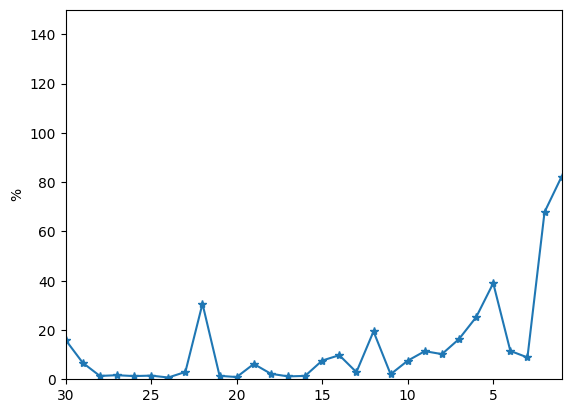

In [20]:
plt.plot(np.arange(30,0, -1), np.array(TSV_list[-30:])*100, '-*')
plt.xlim([30,1])
plt.ylim([0,150])
plt.ylabel('%')

In [87]:
cluster_record[-5]

[[185,
  215,
  191,
  197,
  161,
  209,
  149,
  203,
  167,
  41,
  89,
  35,
  71,
  4,
  130,
  136,
  112,
  118,
  10,
  177,
  22,
  28,
  179,
  107,
  77,
  83,
  154,
  202,
  142,
  148,
  173,
  190,
  178,
  184,
  196,
  214],
 [44,
  187,
  26,
  20,
  43,
  18,
  24,
  60,
  2,
  8,
  126,
  132,
  168,
  169,
  1,
  7,
  55,
  25,
  19,
  54,
  48,
  156,
  163,
  73,
  62,
  127,
  162,
  115,
  133],
 [29,
  65,
  11,
  23,
  5,
  17,
  155,
  137,
  125,
  131,
  143,
  95,
  53,
  59,
  101,
  47,
  113,
  119,
  16,
  100,
  40,
  124,
  52,
  34,
  46,
  106,
  76,
  82,
  88,
  94,
  70,
  160,
  166,
  172,
  208],
 [109,
  139,
  90,
  97,
  12,
  204,
  105,
  75,
  201,
  212,
  213,
  189,
  195,
  69,
  81,
  58,
  64,
  183,
  194,
  68,
  188,
  74,
  159,
  45,
  153,
  207,
  111,
  117,
  141,
  33,
  39,
  93,
  147,
  104,
  87,
  176,
  182,
  198,
  31,
  145,
  186,
  42,
  78,
  210,
  102,
  103,
  121,
  151,
  37,
  66,
  211,
  128,
  134,


In [88]:
optimal_cluster = cluster_record[-5]
traj_cluster_time = 240
optimal_traj = np.zeros([len(optimal_cluster), traj_cluster_time, traj_arr_total.shape[2]])
for i in range(len(optimal_cluster)):
    for j in range(len(optimal_cluster[i])):
        traj_index = optimal_cluster[i][j]
        if j == 0:
            traj_temp = np.zeros([len(optimal_cluster[i]), traj_cluster_time, traj_arr_total.shape[2]])
            traj_temp[0,:,:] = traj_arr_total[traj_index,:traj_cluster_time,:]
        else:
            traj_temp[j,:,:] = traj_arr_total[traj_index,:traj_cluster_time,:]
    print(traj_temp.shape)
    optimal_traj[i] = np.nanmean(traj_temp, axis=0)#如果所有值都是nan，结果还是nan

(36, 240, 3)
(29, 240, 3)
(35, 240, 3)
(61, 240, 3)
(55, 240, 3)


C:\Users\dell\AppData\Local\Temp\ipykernel_7272\1129843055.py:13: RuntimeWarning: Mean of empty slice
  optimal_traj[i] = np.nanmean(traj_temp, axis=0)#如果所有值都是nan，结果还是nan


In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from plot_picture_function import set_map_ticks,add_Chinese_provinces
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.patch import geos_to_path, path_to_geos
from matplotlib.path import Path
from shapely.prepared import prep

from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature

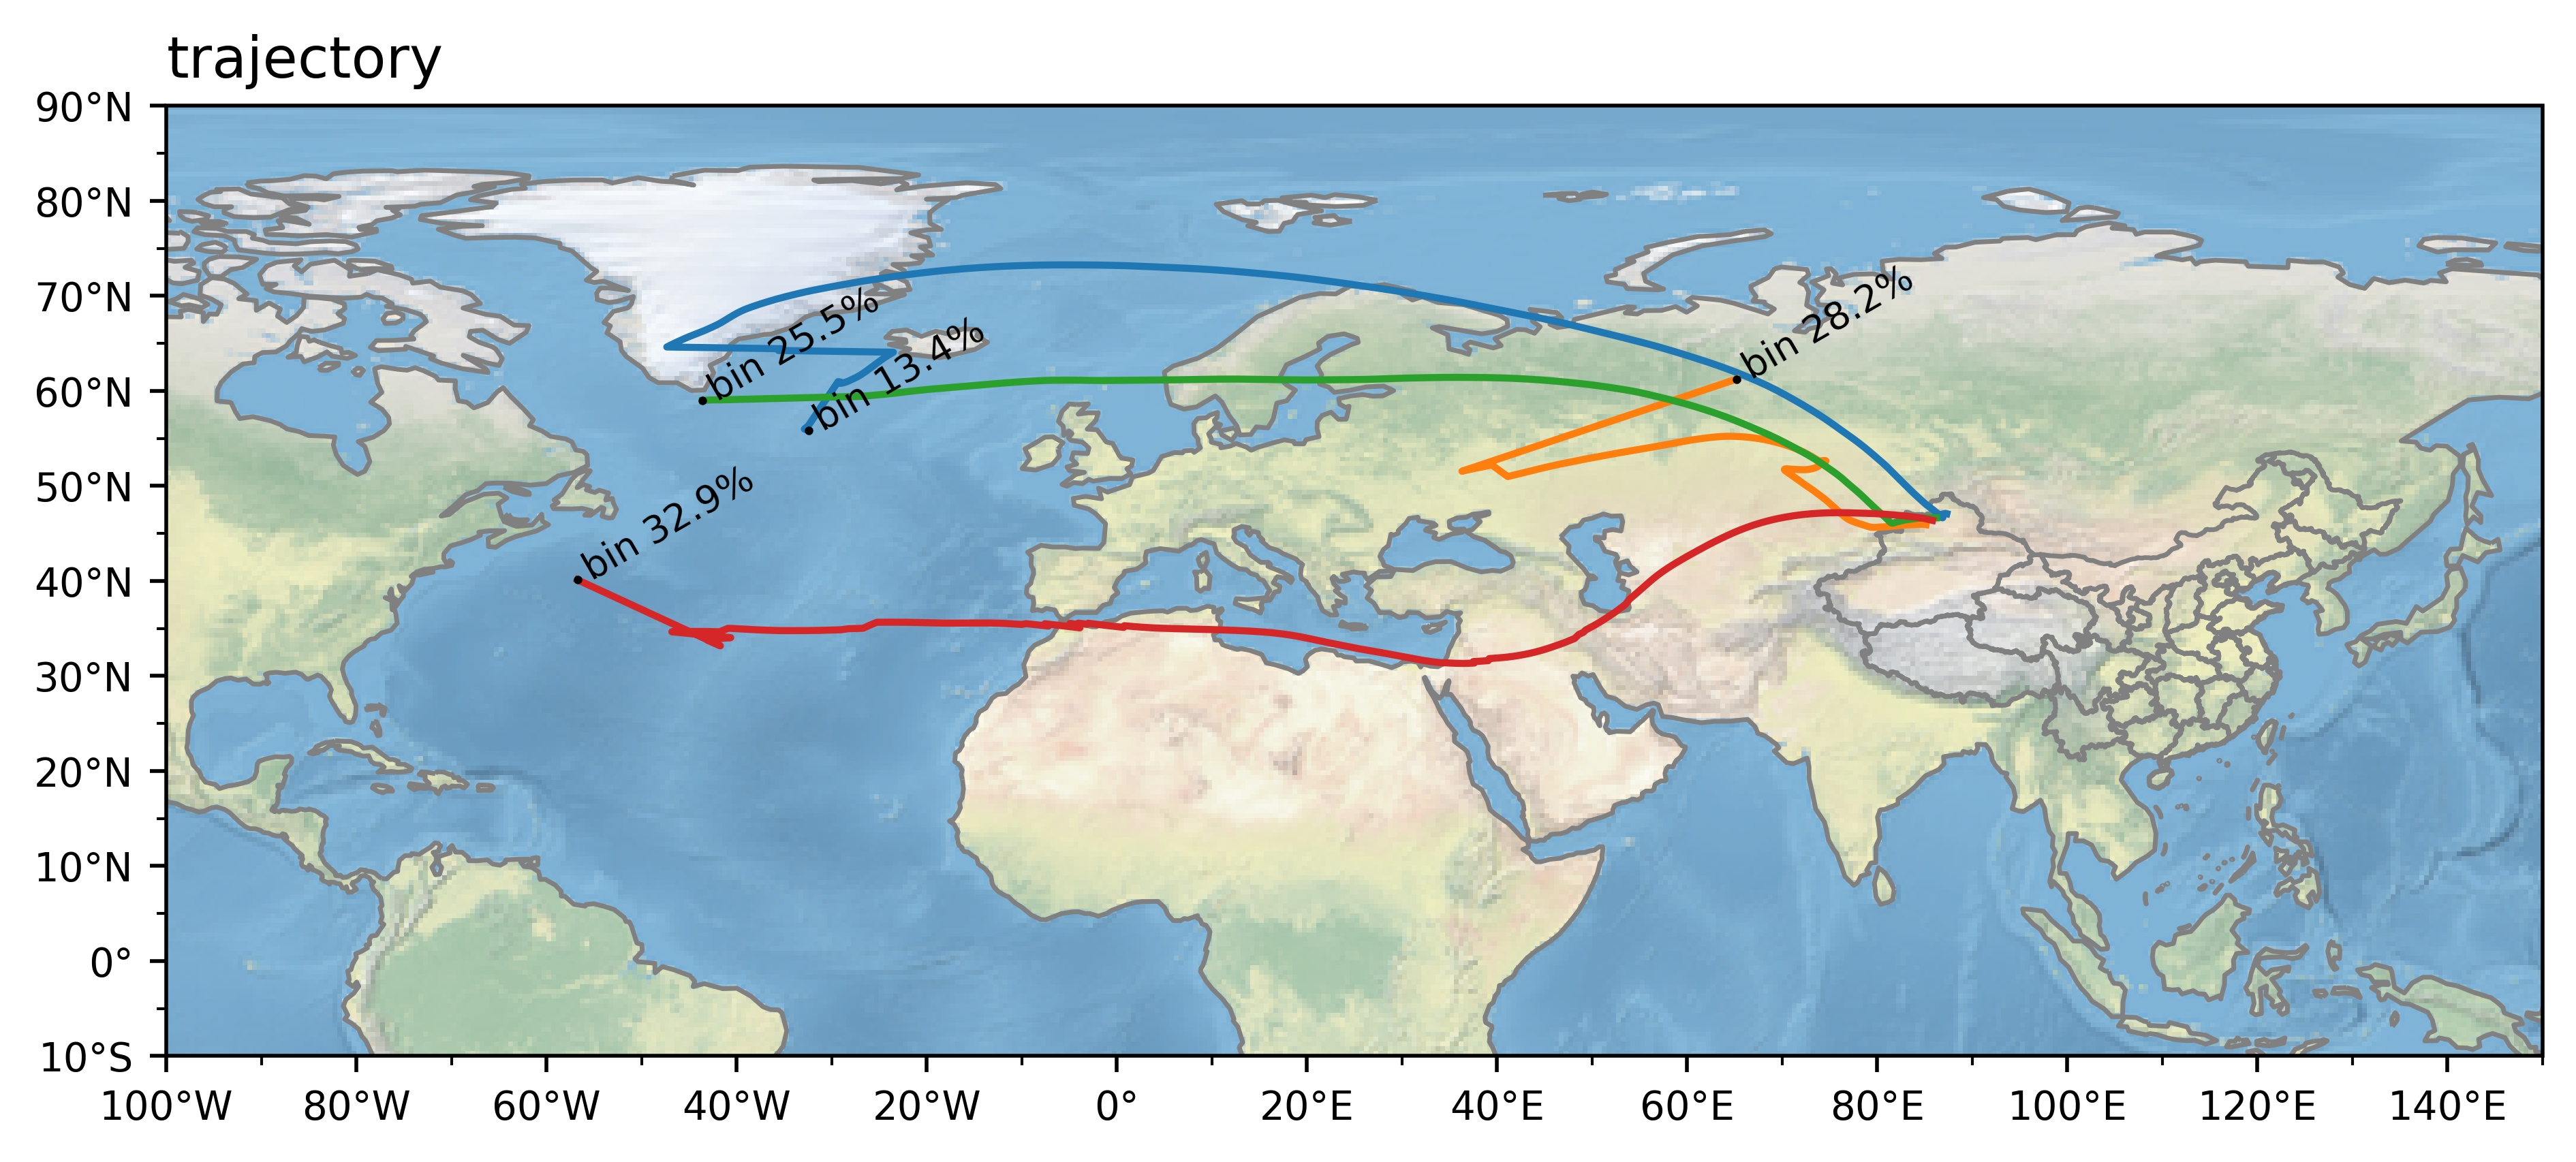

In [82]:
proj = ccrs.PlateCarree()#选择投影方式，平面投影
fig = plt.figure(figsize=(9,6.5), dpi=500)
ax1 = fig.add_subplot(111, projection=proj)#创建一个轴，或者是说主体
ax1.set_title('trajectory', fontsize=12, loc='left')
ax1.coastlines(lw=1, color='gray')
# ax1.add_feature(cfeature.LAND)
# ax1.add_feature(cfeature.OCEAN)
ax1.stock_img()
add_Chinese_provinces(ax1, lw=1, ec='gray', fc='none')#后两个参数是设置eagecolor,facecolor,linewigth线宽
set_map_ticks(ax1, dx=20, dy=10, nx=1, ny=1, labelsize='small')#自定义函数set_map_tick

Bin_total = traj_arr_total.shape[0]
endpoints = []
for i in range(len(optimal_traj)):
    nan_num = np.isnan(optimal_traj[i,:,1]).sum()
    endpoints.append(traj_cluster_time - nan_num)
for i in range(len(optimal_traj)):
    ax1.plot(optimal_traj[i,:,1], optimal_traj[i,:,0])
for i in range(len(endpoints)):
    endIndex = endpoints[i]
    ax1.plot(optimal_traj[i,endIndex-1,1], optimal_traj[i,endIndex-1,0], 'ko', markersize=0.8) 
    plt.text(optimal_traj[i,endIndex-1,1], optimal_traj[i,endIndex-1,0], 
             'bin {:.1f}%'.format(len(optimal_cluster[i])/Bin_total*100), fontsize=8, rotation=30)
extent = [-100, 150, -10, 90]
ax1.set_extent(extent, crs=proj)

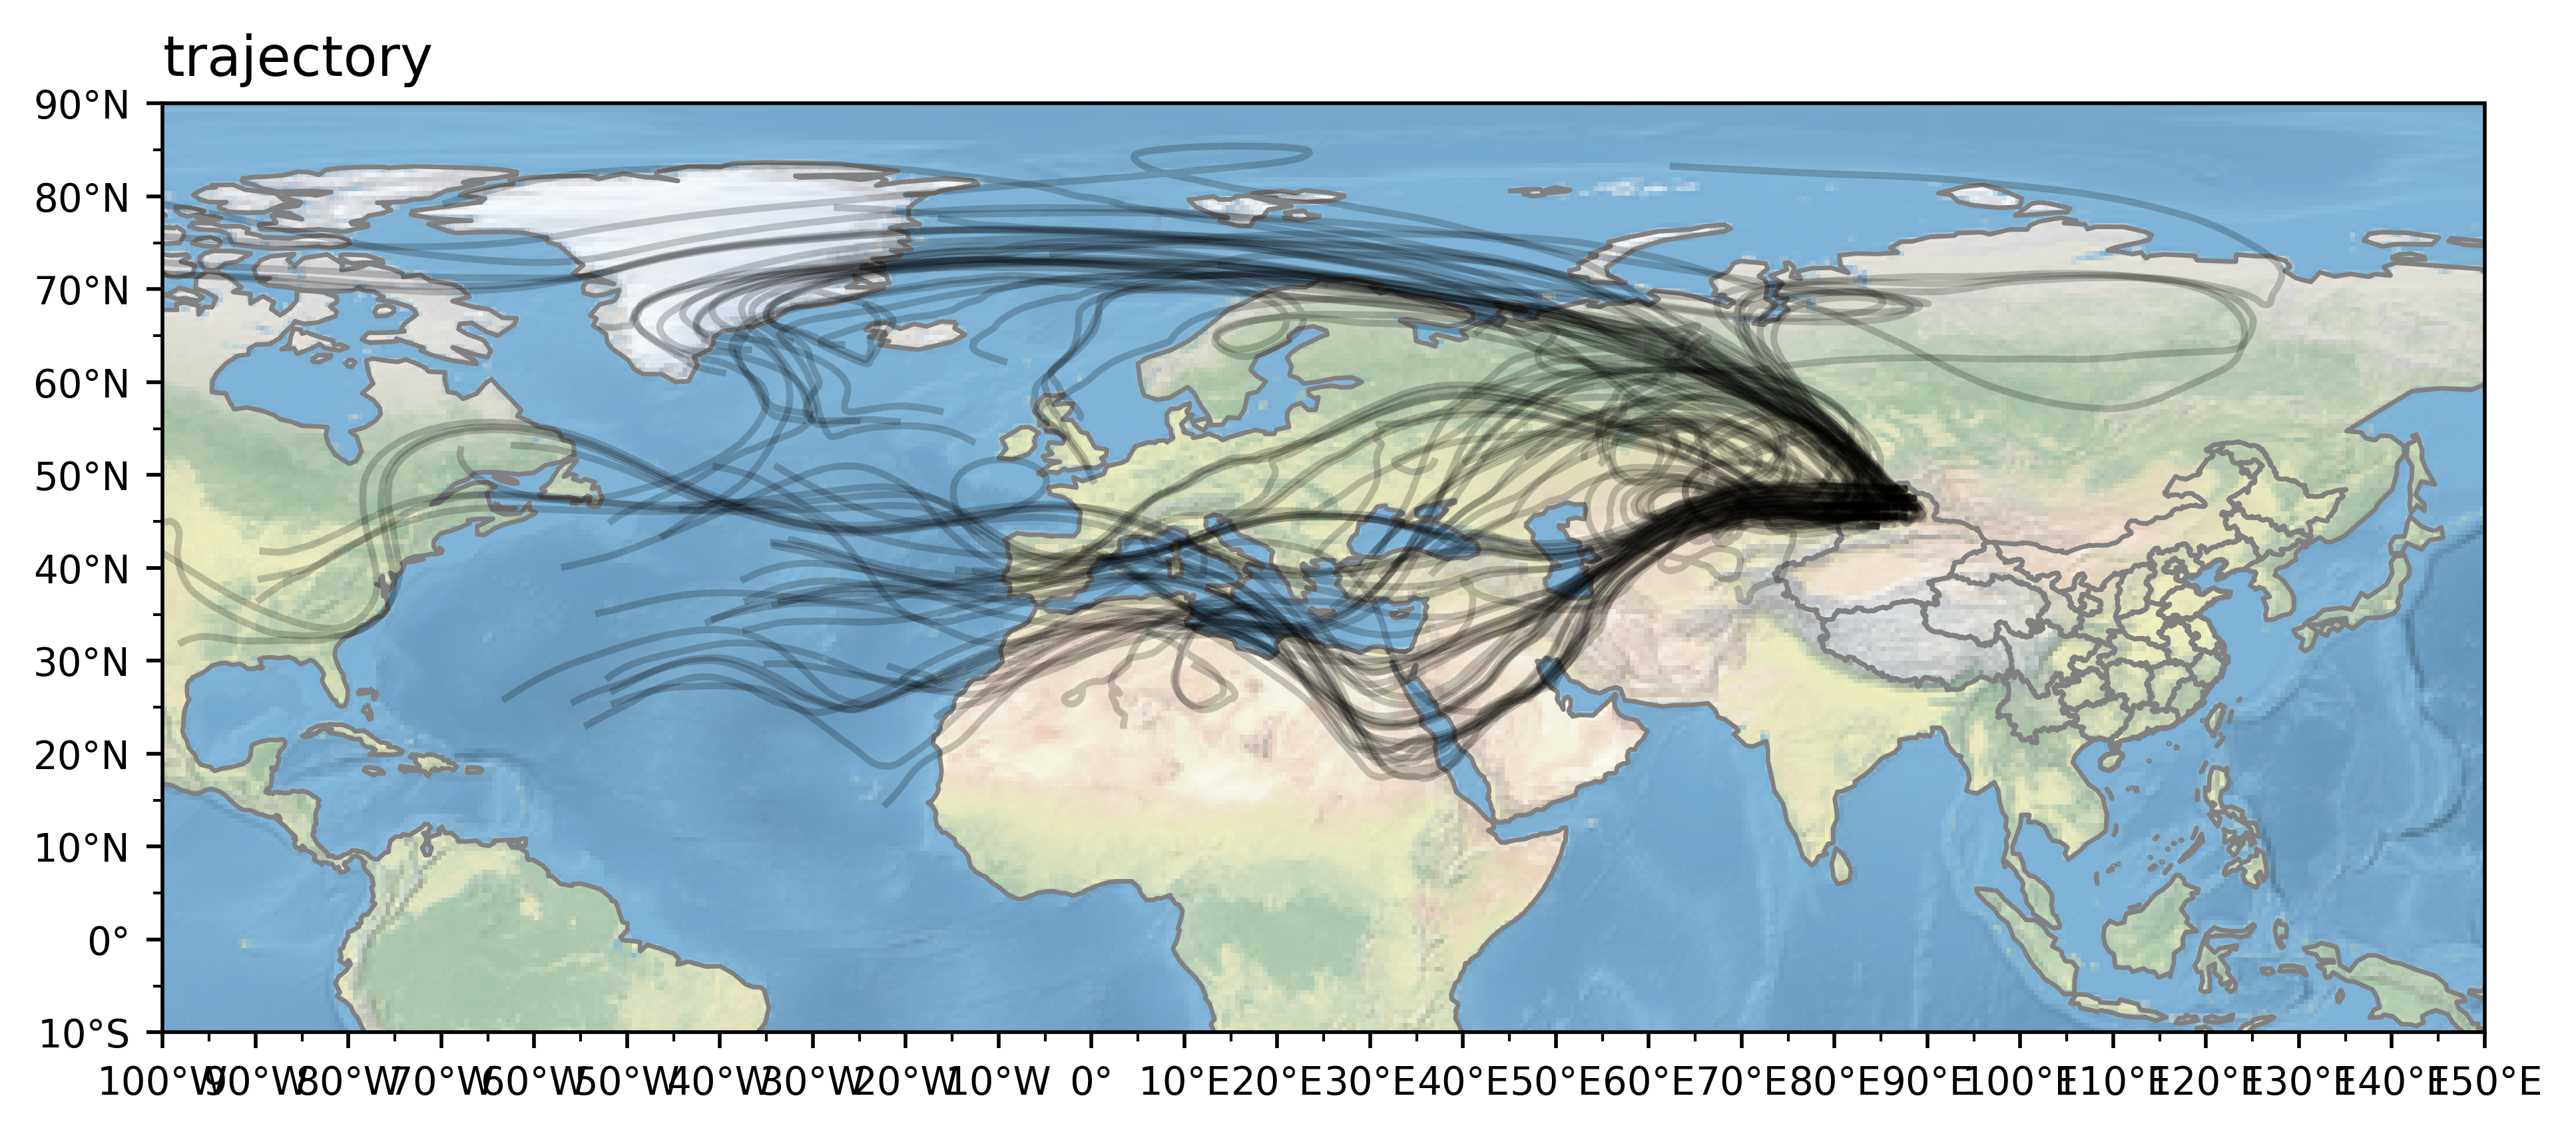

In [79]:
proj = ccrs.PlateCarree()#选择投影方式，平面投影
fig = plt.figure(figsize=(9,6.5), dpi=500)
ax1 = fig.add_subplot(111, projection=proj)#创建一个轴，或者是说主体
ax1.set_title('trajectory', fontsize=12, loc='left')
ax1.coastlines(lw=1, color='gray')
# ax1.add_feature(cfeature.LAND)
# ax1.add_feature(cfeature.OCEAN)
ax1.stock_img()
add_Chinese_provinces(ax1, lw=1, ec='gray', fc='none')#后两个参数是设置eagecolor,facecolor,linewigth线宽
set_map_ticks(ax1, dx=10, dy=10, nx=1, ny=1, labelsize='small')#自定义函数set_map_tick
# extent = [-10, 150, -10, 90]
extent = [-100, 150, -10, 90]
ax1.set_extent(extent, crs=proj)

Bin_total = traj_arr.shape[0]
for i in range(Bin_total):
    ax1.plot(traj_arr[i,:,1], traj_arr[i,:,0], color='k', alpha=0.2)

In [167]:
traj_arr[0, :, :]

array([[48.5  , 86.5  ,  5.3  ],
       [48.525, 86.547,  5.   ],
       [48.552, 86.574,  4.8  ],
       [48.583, 86.579,  4.8  ],
       [48.617, 86.568,  4.9  ],
       [48.654, 86.549,  5.   ],
       [48.691, 86.531,  5.   ],
       [48.729, 86.501,  5.1  ],
       [48.77 , 86.45 ,  5.1  ],
       [48.818, 86.388,  5.1  ],
       [48.869, 86.319,  5.   ],
       [48.911, 86.238,  5.   ],
       [48.947, 86.141,  5.1  ],
       [48.97 , 86.036,  5.2  ],
       [48.976, 85.932,  5.3  ],
       [48.97 , 85.822,  5.4  ],
       [48.963, 85.721,  5.6  ],
       [48.964, 85.64 ,  5.9  ],
       [48.968, 85.578,  6.4  ],
       [48.972, 85.534,  7.1  ],
       [48.971, 85.512,  7.5  ],
       [48.963, 85.512,  7.5  ],
       [48.952, 85.545,  6.8  ],
       [48.945, 85.622,  5.9  ],
       [48.947, 85.737,  5.4  ],
       [48.964, 85.851,  5.3  ],
       [48.994, 85.93 ,  5.2  ],
       [49.032, 85.965,  5.2  ],
       [49.071, 85.967,  5.2  ],
       [49.104, 85.943,  5.3  ],
       [49

In [181]:
# np.unique(np.round(traj_arr[0,:,:-1]),axis=0)

In [223]:
traj_dict = {}
latlon_unique = []
traj_trans = np.round(traj_arr[0,:,:-1])
for i in range(len(traj_trans)):
    lat = traj_trans[i, 0]
    lon = traj_trans[i, 1]
    str_traj = str(int(lat))+'#'+str(int(lon))
    if str_traj in traj_dict.keys():
        traj_dict[str_traj].append(traj_arr[0,i,2])
    else:
        latlon_unique.append([lat, lon])
        traj_dict[str_traj] = [traj_arr[0,i,2]]

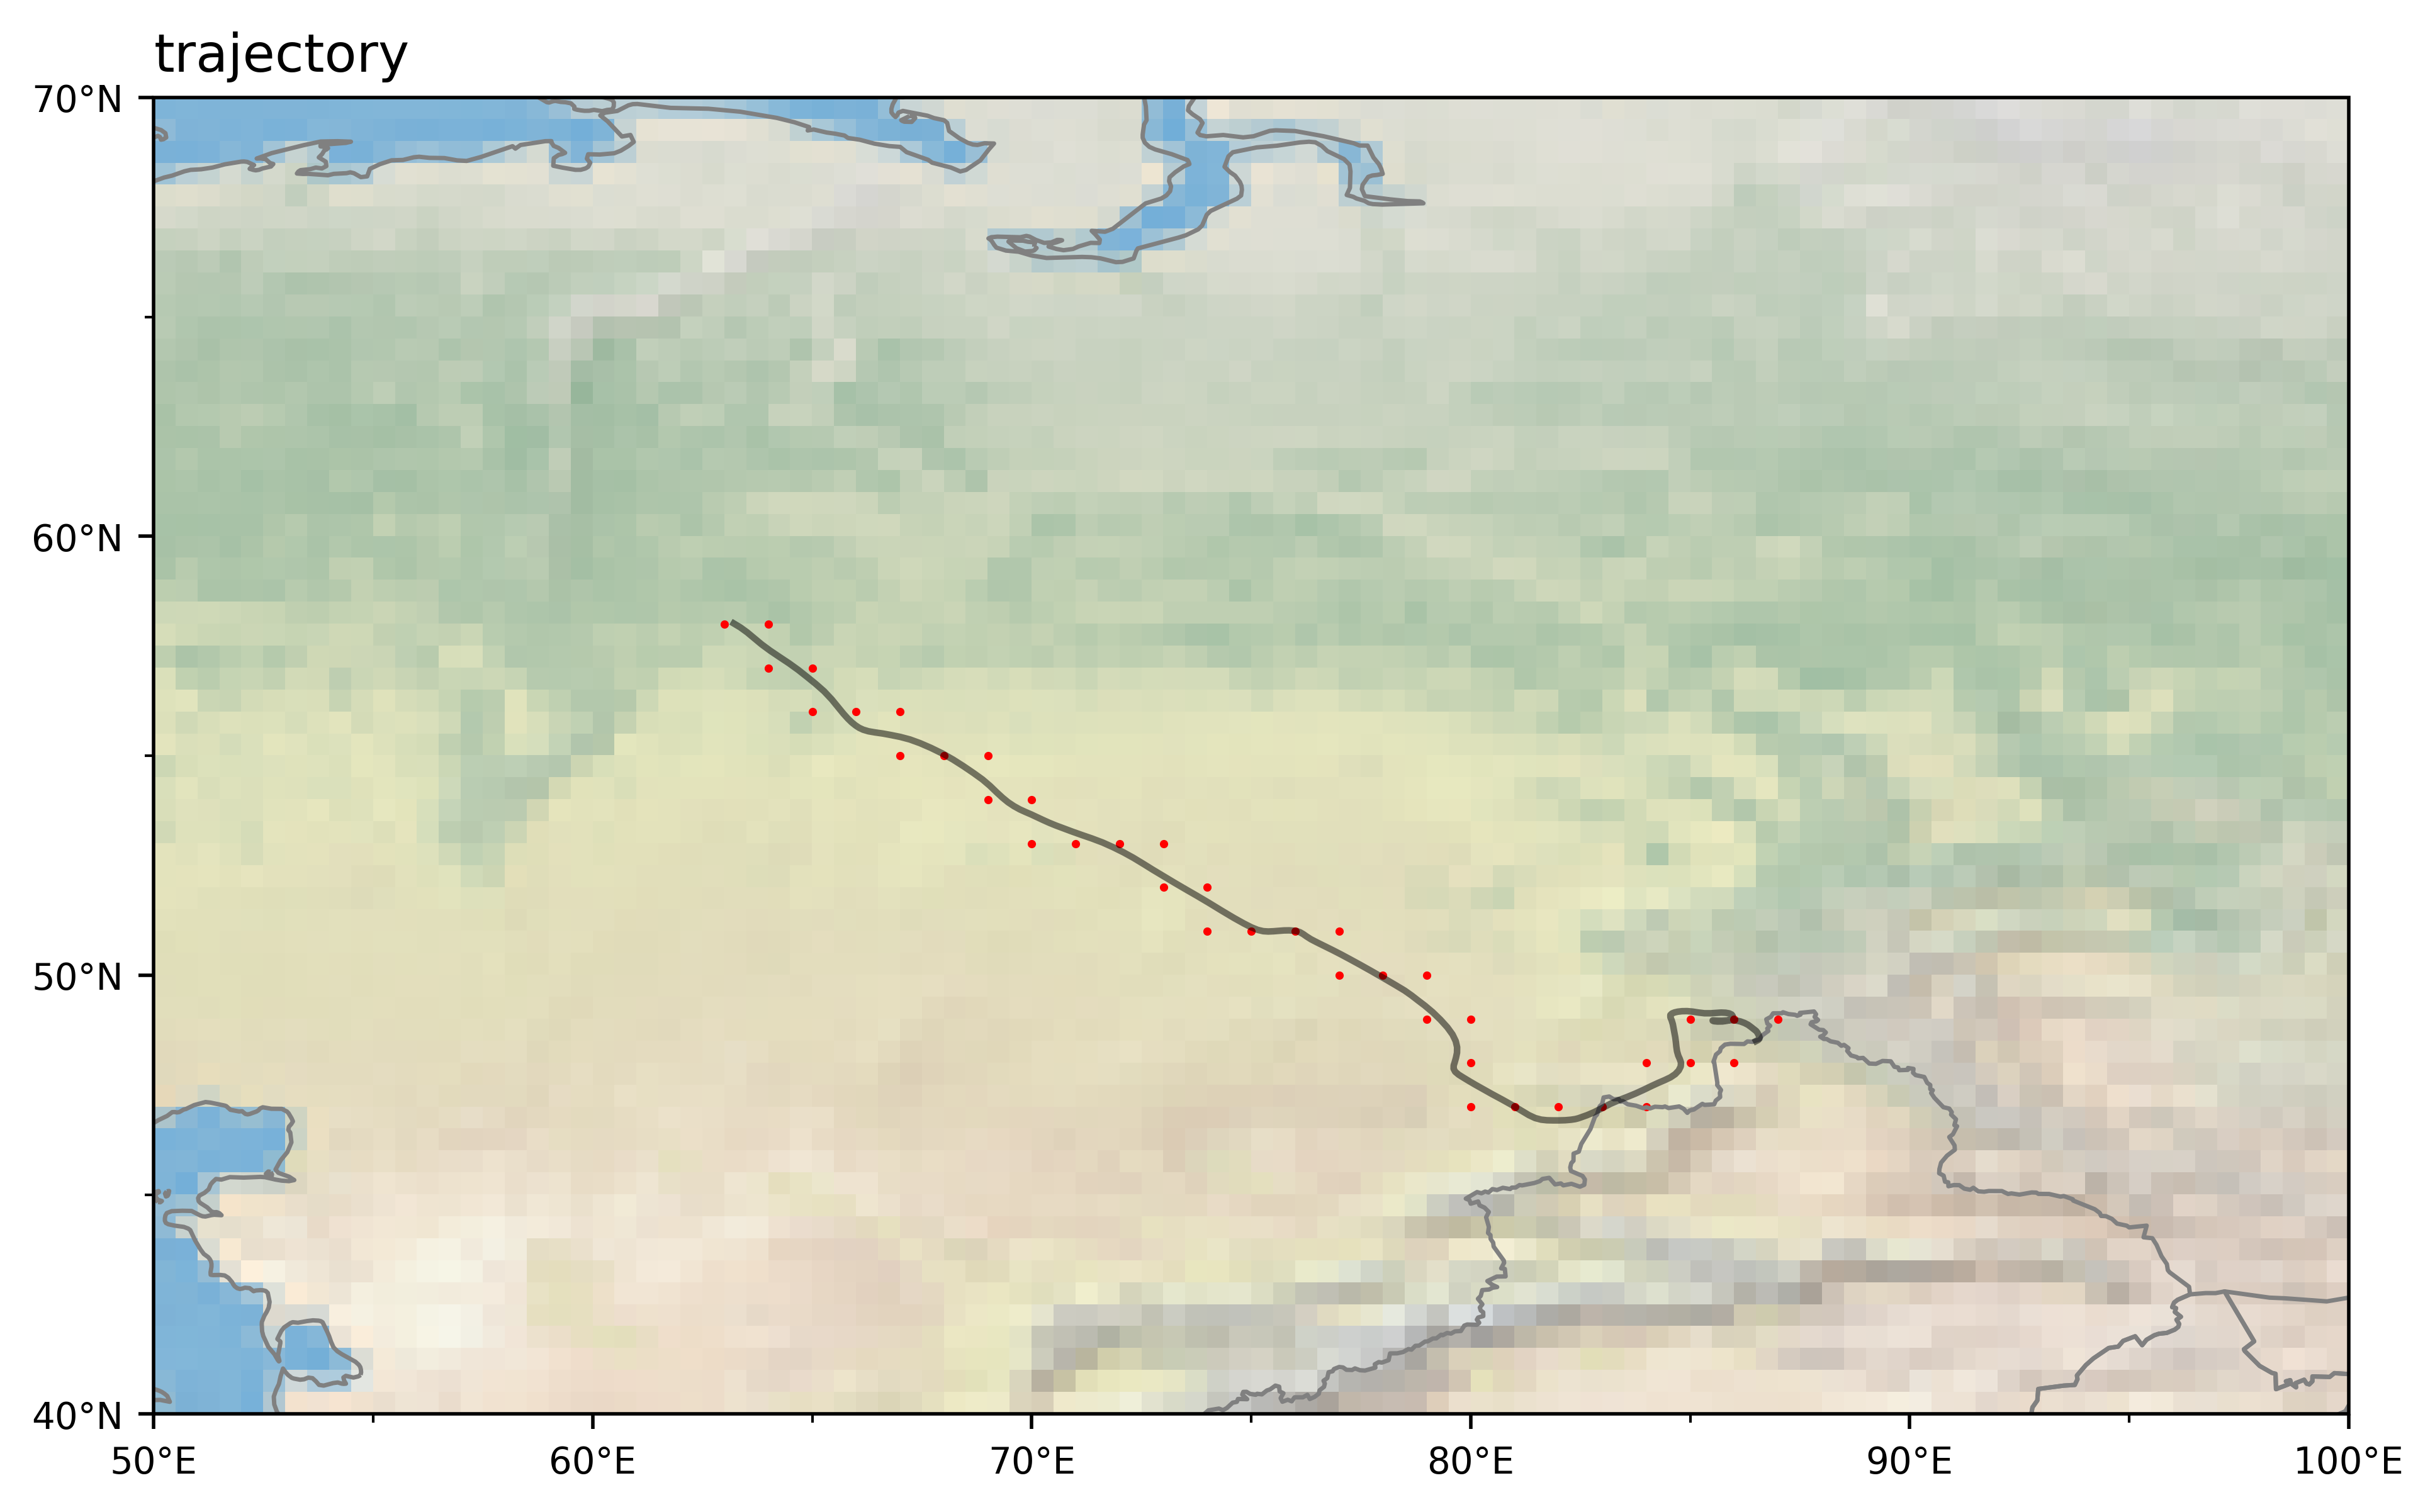

In [204]:
# latlon_unique
proj = ccrs.PlateCarree()#选择投影方式，平面投影
fig = plt.figure(figsize=(9,6.5), dpi=500)
ax1 = fig.add_subplot(111, projection=proj)#创建一个轴，或者是说主体
ax1.set_title('trajectory', fontsize=12, loc='left')
ax1.coastlines(lw=1, color='gray')
# ax1.add_feature(cfeature.LAND)
# ax1.add_feature(cfeature.OCEAN)
ax1.stock_img()
add_Chinese_provinces(ax1, lw=1, ec='gray', fc='none')#后两个参数是设置eagecolor,facecolor,linewigth线宽
set_map_ticks(ax1, dx=10, dy=10, nx=1, ny=1, labelsize='small')#自定义函数set_map_tick
extent = [50, 100, 40, 70]
ax1.set_extent(extent, crs=proj)

ax1.plot(traj_arr[0,:,1], traj_arr[0,:,0], color='k', alpha=0.5)
for i in range(len(latlon_unique)):
    ax1.scatter(latlon_unique[i][1], latlon_unique[i][0], color='r', s=0.8)

In [208]:
# list(traj_dict.keys())[::-1],list(traj_dict.keys())

In [277]:
grib_map = np.zeros([101, 161])#10S-90N, 10W-150E
grib_lon = np.arange(-10, 150.5, 1)
grib_lat = np.arange(90, -10.5, -1)

In [278]:

def grib_rowcol(lat, lon):
    row = 90-lat
    column = lon-(-10)
    return row, column
def Get_trajString(lat:int, lon:int)->str:
    return str(int(lat))+'#'+str(int(lon))
def Get_trajDiction(one_trajArr):
    traj_dict = {}
    latlon_unique = []
    traj_trans = np.round(one_trajArr[:,:-1])
    for i in range(len(traj_trans)):
        if np.isnan(traj_trans[i,0]):#遇到nan数据直接break循环
            break
        lat = round(traj_trans[i, 0])
        lon = round(traj_trans[i, 1])
        str_traj = Get_trajString(lat, lon)
        if str_traj in traj_dict.keys():
            traj_dict[str_traj].append(one_trajArr[i,2])
        else:
            latlon_unique.append([lat, lon])
            traj_dict[str_traj] = [one_trajArr[i,2]]
    return latlon_unique[::-1], traj_dict #latlon_unique需要逆序，因为是后向追踪

count_assign = 0
for i in range(traj_arr.shape[0]):
    #将轨迹量化为格点级别的轨迹
    latlon_unique, traj_dict = Get_trajDiction(traj_arr[i,:,:])
#     print(latlon_unique)
    for j in range(len(latlon_unique)):
        if j == 0:
            #row_n, col_n = grib_rowcol(latlon_unique[j][0], latlon_unique[j][1])
            #keyname = Get_trajString(latlon_unique[j][0], latlon_unique[j][1])
            grib_map[row_n, col_n] = 0
            count_assign += 1
        else:
            row_n, col_n = grib_rowcol(latlon_unique[j][0], latlon_unique[j][1])
            keyname1 = Get_trajString(latlon_unique[j][0], latlon_unique[j][1])
            keyname2 = Get_trajString(latlon_unique[j-1][0], latlon_unique[j-1][1])
            grib_map[row_n, col_n] += traj_dict[keyname1][-1] - traj_dict[keyname2][-1]
            count_assign += 1
            if (latlon_unique[j][0]<48.5) & (latlon_unique[j][0]>44.5):
                if (latlon_unique[j][1]<88.5) & (latlon_unique[j][1]>82.5):
                    break
print("赋值：", count_assign)          

赋值： 6384


In [273]:
grib_lat.shape, grib_lon.shape, grib_map.shape

((101,), (161,), (101, 161))

In [279]:
grib_map[grib_map == 0] = np.nan

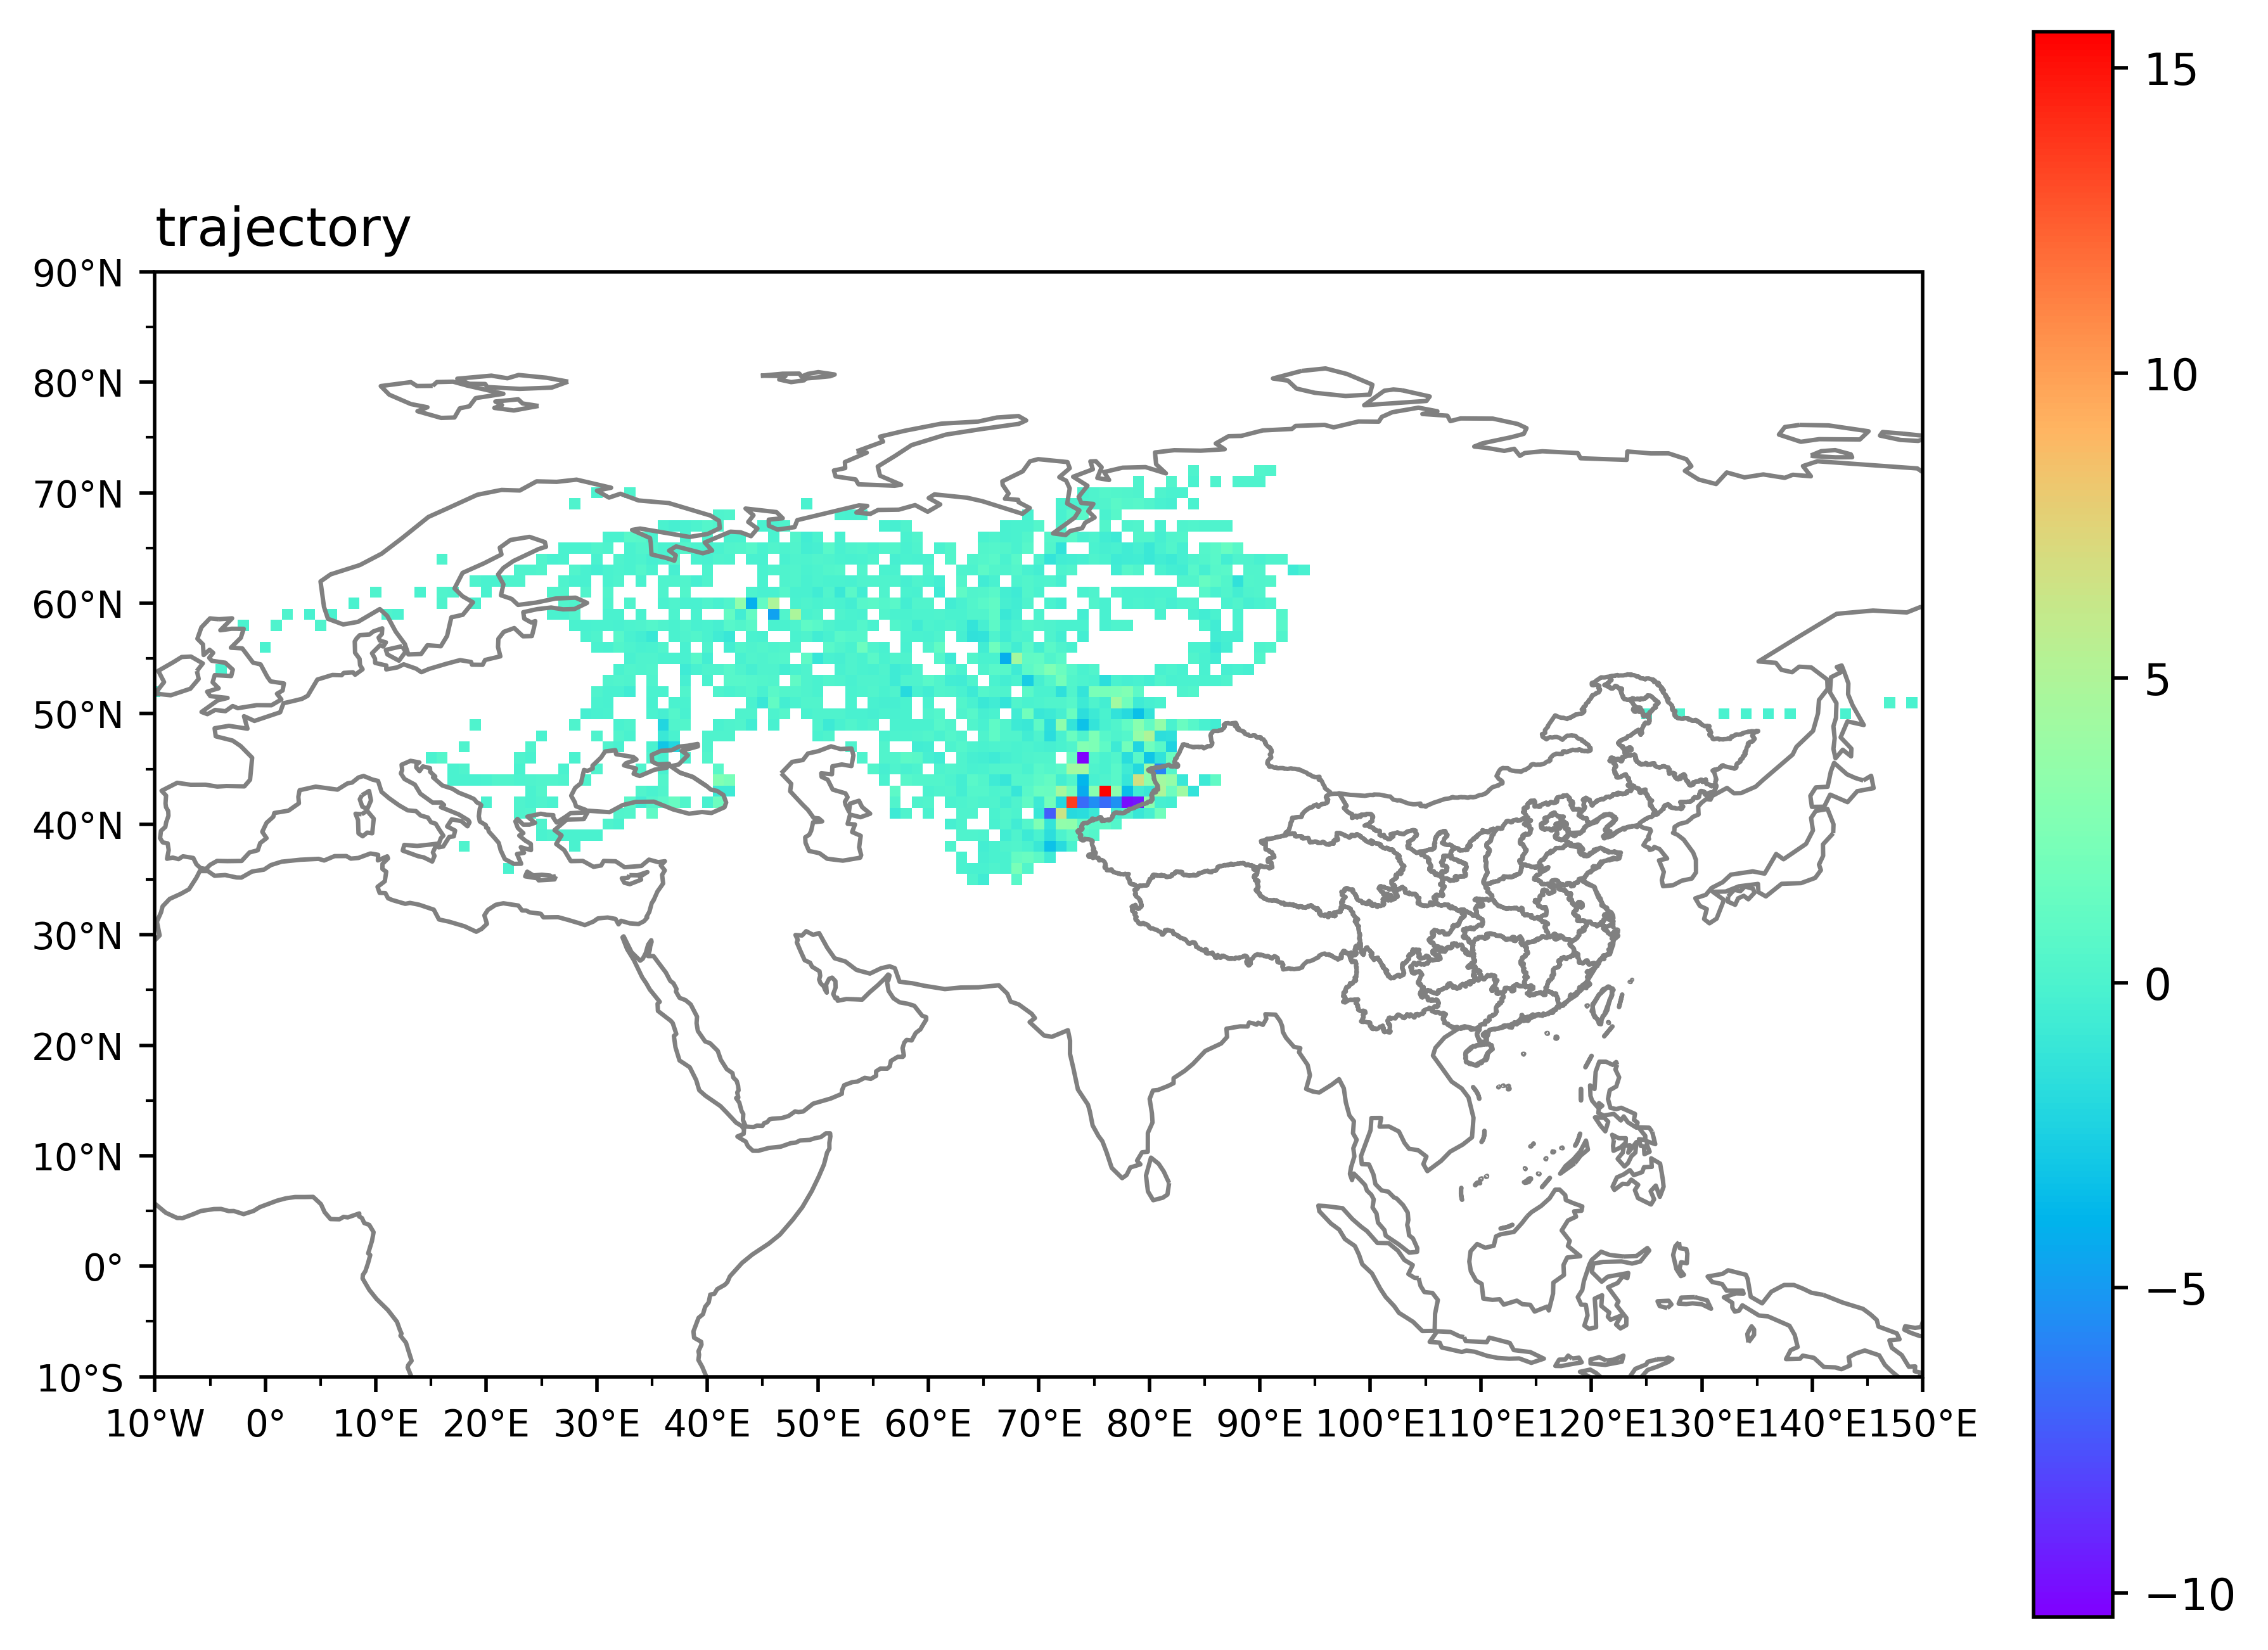

In [280]:
proj = ccrs.PlateCarree()#选择投影方式，平面投影
fig = plt.figure(figsize=(9,6.5), dpi=500)
ax1 = fig.add_subplot(111, projection=proj)#创建一个轴，或者是说主体
ax1.set_title('trajectory', fontsize=12, loc='left')
ax1.coastlines(lw=1, color='gray')
# ax1.add_feature(cfeature.LAND)
# ax1.add_feature(cfeature.OCEAN)
# ax1.stock_img()
cax = ax1.pcolormesh(grib_lon, grib_lat, grib_map, cmap='rainbow', transform=ccrs.PlateCarree())
add_Chinese_provinces(ax1, lw=1, ec='gray', fc='none')#后两个参数是设置eagecolor,facecolor,linewigth线宽
set_map_ticks(ax1, dx=10, dy=10, nx=1, ny=1, labelsize='small')#自定义函数set_map_tick
extent = [-10, 150, -10, 90]
ax1.set_extent(extent, crs=proj)

plt.colorbar(cax)